## K-Means determinando el cluster al que pertenecerían nuevos datos

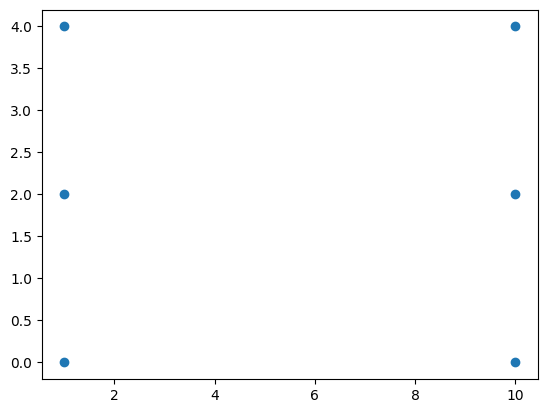

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
plt.scatter(X[:, 0], X[:, 1])

In [2]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [4]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

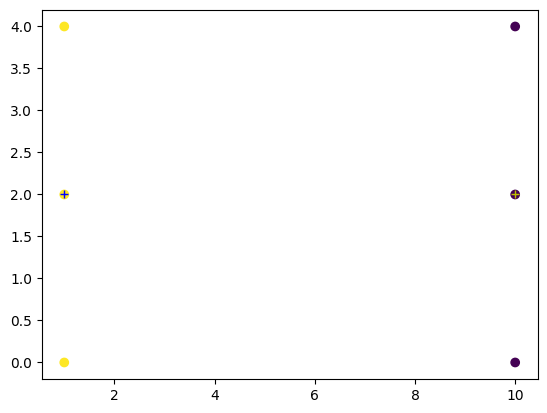

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'y+')
plt.plot(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'b+')

In [6]:
new_data = np.array([[0, 0], [12, 3]])

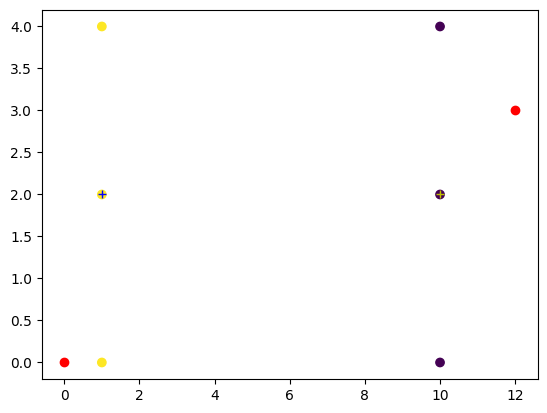

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'y+')
plt.plot(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'b+')
plt.scatter(new_data[:, 0], new_data[:, 1], c='r')

In [8]:
preds = kmeans.predict(new_data)
print(preds)

[1 0]


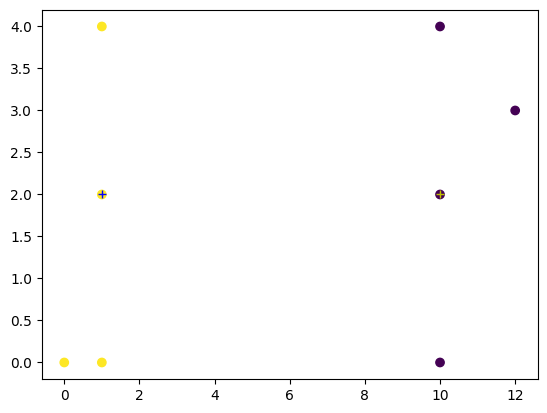

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], 'y+')
plt.plot(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], 'b+')
plt.scatter(new_data[:, 0], new_data[:, 1], c=preds)

## Exportación de modelo entrenado en scikit-learn

In [10]:
from sklearn import datasets
from sklearn import metrics
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
bst = xgb.train({}, dtrain, 20)

In [11]:
dtest = xgb.DMatrix(X_test)
preds = bst.predict(dtest)

In [12]:
preds

array([9.9871826e-01, 1.0723947e-03, 1.9771385e+00, 9.9871826e-01,
       9.9871826e-01, 1.0723947e-03, 1.0000670e+00, 1.6158556e+00,
       1.1161768e+00, 1.0000670e+00, 1.5660467e+00, 1.0723947e-03,
       1.0723947e-03, 1.0723947e-03, 1.0723947e-03, 1.0937718e+00,
       2.0002208e+00, 1.0000670e+00, 9.9871826e-01, 2.0002208e+00,
       1.0723947e-03, 2.0004663e+00, 1.0723947e-03, 2.0002208e+00,
       1.9987544e+00, 2.0002208e+00, 1.9713168e+00, 1.9991689e+00,
       1.0723947e-03, 1.0723947e-03, 1.0723947e-03, 1.0723947e-03,
       1.0000670e+00, 1.0723947e-03, 1.0723947e-03, 1.9718069e+00,
       9.9710232e-01, 1.0723947e-03, 1.0723947e-03, 1.0723947e-03,
       1.9977489e+00, 1.0937718e+00, 9.9871826e-01, 1.0723947e-03,
       1.0723947e-03, 1.0000670e+00, 1.6432334e+00, 2.0002208e+00,
       1.0000670e+00, 1.9987544e+00], dtype=float32)

In [13]:
joblib.dump(bst, 'model.joblib')

['model.joblib']

In [14]:
!ls

model.joblib  sample_data


In [15]:
model = joblib.load('model.joblib')

In [16]:
preds_loaded = model.predict(dtest)

In [17]:
preds_loaded

array([9.9871826e-01, 1.0723947e-03, 1.9771385e+00, 9.9871826e-01,
       9.9871826e-01, 1.0723947e-03, 1.0000670e+00, 1.6158556e+00,
       1.1161768e+00, 1.0000670e+00, 1.5660467e+00, 1.0723947e-03,
       1.0723947e-03, 1.0723947e-03, 1.0723947e-03, 1.0937718e+00,
       2.0002208e+00, 1.0000670e+00, 9.9871826e-01, 2.0002208e+00,
       1.0723947e-03, 2.0004663e+00, 1.0723947e-03, 2.0002208e+00,
       1.9987544e+00, 2.0002208e+00, 1.9713168e+00, 1.9991689e+00,
       1.0723947e-03, 1.0723947e-03, 1.0723947e-03, 1.0723947e-03,
       1.0000670e+00, 1.0723947e-03, 1.0723947e-03, 1.9718069e+00,
       9.9710232e-01, 1.0723947e-03, 1.0723947e-03, 1.0723947e-03,
       1.9977489e+00, 1.0937718e+00, 9.9871826e-01, 1.0723947e-03,
       1.0723947e-03, 1.0000670e+00, 1.6432334e+00, 2.0002208e+00,
       1.0000670e+00, 1.9987544e+00], dtype=float32)

In [18]:
np.allclose(preds, preds_loaded)

True

## Exportación de modelo con Keras

In [19]:
# MLP for Pima Indians Dataset saved to single file
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load pima indians dataset
dataset = loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

accuracy: 77.21%
Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model_loaded = load_model('model.h5')

# summarize model
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# evaluate the model
scores = model_loaded.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.21%
